<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-2-Buildweek-Project/blob/master/DS-Unit-2-Buildweek-Project/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os

In [0]:
pwd

'/Users/fonat/Desktop/Lambda School/Build_Unit_2_Project_Auto_Insurance_France'

In [0]:

df = pd.read_csv(r'/Users/fonat/Desktop/Lambda School/Build_Unit_2_Project_Auto_Insurance_France/french_auto_insurance.csv')

In [0]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [0]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [0]:
df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [0]:
df['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

## Base Model 1
Target= ClaimNb
Model= logistic Regression
Evaluation Metric. = F-1 Score and Validation Accuracy

Description = Make ClaimNumber feature 2-class feature
              


In [0]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
df_model = df.copy()

In [0]:
df_model['ClaimNb'].value_counts(normalize=True)

0     0.949765
1     0.047459
2     0.002631
3     0.000121
4     0.000010
11    0.000004
5     0.000003
16    0.000001
9     0.000001
8     0.000001
6     0.000001
Name: ClaimNb, dtype: float64

In [0]:
df_model['ClaimNb'].value_counts()

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
16         1
9          1
8          1
6          1
Name: ClaimNb, dtype: int64

In [0]:
# I will create a new column for number of claims per policy.
df_model['ClaimNumber'] = df_model['ClaimNb']

In [0]:
df_model.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# I modify the new 'Claimnumber' column to have just 2 classes : 0 ='no claim', 1= 'Claim'. 
df_model['ClaimNumber'] = df_model['ClaimNumber'].replace({0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 11:1 ,
                                                               5: 1, 16: 1, 9: 1, 8: 1, 6:1})
df_model.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# I will use "ClaimNumber" feature as the target for the model
y = df_model['ClaimNumber']

In [0]:
# Baseline for the majority class
df_model['ClaimNumber'].value_counts(normalize=True)

0    0.949765
1    0.050235
Name: ClaimNumber, dtype: float64

In [0]:
df_model.dtypes

IDpol          float64
ClaimNb          int64
Exposure       float64
Area            object
VehPower         int64
VehAge           int64
DrivAge          int64
BonusMalus       int64
VehBrand        object
VehGas          object
Density          int64
Region          object
ClaimNumber      int64
dtype: object

In [0]:
df_model.head() 

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,1
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,1
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1


In [0]:
# Split for test and train
train, test = train_test_split(df_model, train_size=0.80, test_size=0.20, stratify=df_model['ClaimNumber'], random_state=42)

train.shape, test.shape

((542410, 13), (135603, 13))

In [0]:
# Split for train and val 
train, val = train_test_split(train, train_size = 0.80, test_size=0.20, stratify=train['ClaimNumber'], random_state=42)

train.shape, val.shape

((433928, 13), (108482, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
train.head()

,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimNumber
226447,0.74,C,5,11,30,68,B5,Diesel,282,R24,0
456701,1.00,A,15,21,42,50,B1,Regular,39,R24,0
598219,0.19,C,5,2,59,50,B2,Regular,109,R91,0
658764,0.04,C,4,4,42,50,B12,Diesel,162,R93,0
327686,1.00,C,6,10,44,50,B2,Regular,217,R52,0


In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [0]:
# TODO
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(max_iter=1000)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.9497612507144042


In [0]:
# Test accuracy
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 94.9772%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[128789      2]
 [  6809      3]]


Logistic Regression 
Confusion Matrix


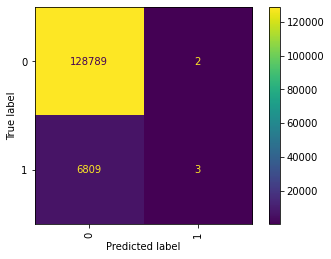

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
title='Logistic Regression \nConfusion Matrix'
print(title)
plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.95      1.00      0.97    128791
           1       0.60      0.00      0.00      6812

    accuracy                           0.95    135603
   macro avg       0.77      0.50      0.49    135603
weighted avg       0.93      0.95      0.93    135603



## Logistic regression with downsampling


In [0]:
df_model_1 = df_model.copy()
df_model_1['ClaimNumber'].value_counts()

0    643953
1     34060
Name: ClaimNumber, dtype: int64

In [0]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df_model_1[df_model_1['ClaimNumber']==0]
df_minority = df_model_1[df_model_1['ClaimNumber']==1]

# undersample majority class
df_majority_undersampled_1 = resample(df_majority, replace=True, n_samples=34060, random_state=0)


# combine majority class with oversampled minority class
df_undersampled_1 = pd.concat([df_minority, df_majority_undersampled_1])

# display new class value counts
df_undersampled_1['ClaimNumber'].value_counts()

1    34060
0    34060
Name: ClaimNumber, dtype: int64

In [0]:
#Split the data
train1, test1 = train_test_split(df_undersampled_1, test_size=0.2, stratify=df_undersampled_1['ClaimNumber'], random_state=42)

train1.shape, test1.shape

((54496, 13), (13624, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train1 = wrangle(train1)
test1 = wrangle(test1)

In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train1 = train1.drop(columns=target)
y_train1 = train1[target]
X_test1 = test1.drop(columns=target)
y_test1 = test1[target]

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(max_iter=1000)
)

# Fit on train
pipeline.fit(X_train1, y_train1)

# Predict on test
y_pred1 = pipeline.predict(X_test1)

In [0]:
# Test accuracy
accuracy = accuracy_score(y_pred1, y_test1)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 59.3144%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[3916 2896]
 [2647 4165]]


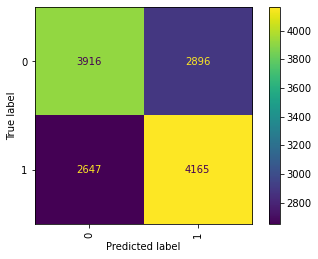

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_test1, y_test1, values_format='.0f', xticks_rotation='vertical')

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test1, y_pred1))

Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.57      0.59      6812
           1       0.59      0.61      0.60      6812

    accuracy                           0.59     13624
   macro avg       0.59      0.59      0.59     13624
weighted avg       0.59      0.59      0.59     13624



In [0]:
pipeline.predict(X_test1)

array([0, 1, 0, ..., 1, 1, 0])

In [0]:
pipeline.predict_proba(X_test1)

array([[0.7379572 , 0.2620428 ],
       [0.32677954, 0.67322046],
       [0.52643753, 0.47356247],
       ...,
       [0.40509685, 0.59490315],
       [0.48181653, 0.51818347],
       [0.68314097, 0.31685903]])

In [0]:
pipeline.predict_proba(X_test1)[:, 1]

array([0.2620428 , 0.67322046, 0.47356247, ..., 0.59490315, 0.51818347,
       0.31685903])

In [0]:
threshold = 0.50
pipeline.predict_proba(X_test1)[:, 1] > threshold

array([False,  True, False, ...,  True,  True, False])

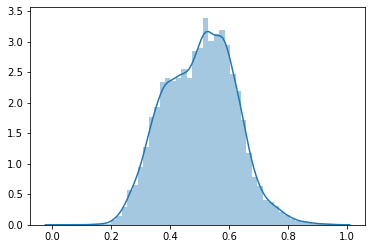

In [0]:
import seaborn as sns

y_pred_proba1 = pipeline.predict_proba(X_test1)[:, 1]
sns.distplot(y_pred_proba1);


True     7114
False    6510
dtype: int64

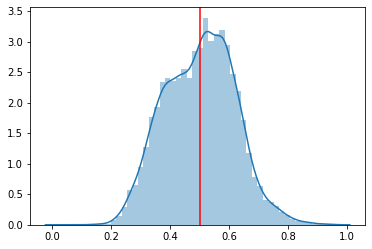

In [0]:
threshold = 0.50

y_pred1 = y_pred_proba1 > threshold

ax = sns.distplot(y_pred_proba1)
ax.axvline(threshold, color='red')

pd.Series(y_pred1).value_counts()

In [0]:
# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)

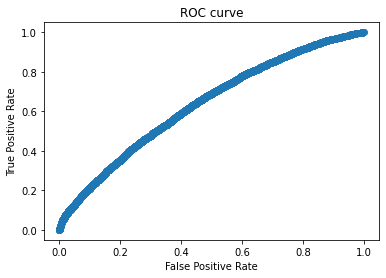

In [0]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test1, y_pred_proba1)

0.6359509133652093

## I will oversample the minority class. 

In [0]:
# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df_model_1[df_model_1['ClaimNumber']==0]
df_minority = df_model_1[df_model_1['ClaimNumber']==1]

# oversample minority class
df_minority_oversampled_1 = resample(df_minority, replace=True, n_samples=643953, random_state=0)


# combine majority class with oversampled minority class
df_oversampled_1 = pd.concat([df_majority, df_minority_oversampled_1])

# display new class value counts
df_oversampled_1['ClaimNumber'].value_counts()

1    643953
0    643953
Name: ClaimNumber, dtype: int64

In [0]:
#Split the data
train2, test2 = train_test_split(df_oversampled_1, test_size=0.2, stratify=df_oversampled_1['ClaimNumber'], random_state=42)

train2.shape, test2.shape

((1030324, 13), (257582, 13))

In [0]:
def wrangle(X):
    # Drop IDpol since it doesn't have any explanatory power
    # Drop ClaimNb as they are a function of our target.
    column_drop = ['IDpol','ClaimNb']
    X = X.drop(columns=column_drop)
    return X

In [0]:
train2 = wrangle(train2)
test2 = wrangle(test2)

In [0]:
# Arranging features matrix and y target vector
target = 'ClaimNumber'
X_train2 = train2.drop(columns=target)
y_train2 = train2[target]
X_test2 = test2.drop(columns=target)
y_test2 = test2[target]

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(max_iter=1000)
)

# Fit on train
pipeline.fit(X_train2, y_train2)

# Predict on test
y_pred2 = pipeline.predict(X_test2)

In [0]:
# Test accuracy
accuracy = accuracy_score(y_pred2, y_test2)

print("Accuracy : %.4f%%" % (accuracy * 100.0))

Accuracy : 59.2747%


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test2, y_pred2)

print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[74396 54395]
 [50506 78285]]


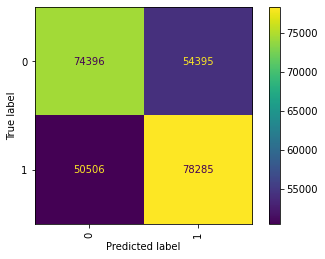

In [0]:
# Explanatory graph: Confusion Matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_test2, y_test2, values_format='.0f', xticks_rotation='vertical')

In [0]:
# import the metric
from sklearn.metrics import classification_report

# print classification report
print("Classification Report:\n\n", classification_report(y_test2, y_pred2))

Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.58      0.59    128791
           1       0.59      0.61      0.60    128791

    accuracy                           0.59    257582
   macro avg       0.59      0.59      0.59    257582
weighted avg       0.59      0.59      0.59    257582



In [0]:
pipeline.predict(X_test2)

array([0, 1, 0, ..., 1, 0, 1])

In [0]:
pipeline.predict_proba(X_test2)

array([[0.61877531, 0.38122469],
       [0.39042981, 0.60957019],
       [0.56549005, 0.43450995],
       ...,
       [0.41376902, 0.58623098],
       [0.52472497, 0.47527503],
       [0.40349983, 0.59650017]])

In [0]:
pipeline.predict_proba(X_test2)[:, 1]

array([0.38122469, 0.60957019, 0.43450995, ..., 0.58623098, 0.47527503,
       0.59650017])

In [0]:
threshold = 0.50
pipeline.predict_proba(X_test2)[:, 1] > threshold

array([False,  True, False, ...,  True, False,  True])

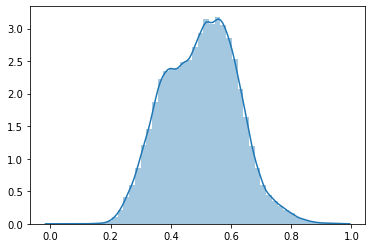

In [0]:
import seaborn as sns

y_pred_proba2 = pipeline.predict_proba(X_test2)[:, 1]
sns.distplot(y_pred_proba2);

True     132680
False    124902
dtype: int64

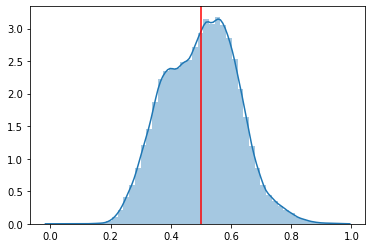

In [0]:
threshold = 0.50

y_pred2 = y_pred_proba2 > threshold

ax = sns.distplot(y_pred_proba2)
ax.axvline(threshold, color='red')

pd.Series(y_pred2).value_counts()

In [0]:
# Use scikit-learn to calculate TPR & FPR at various thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba2)

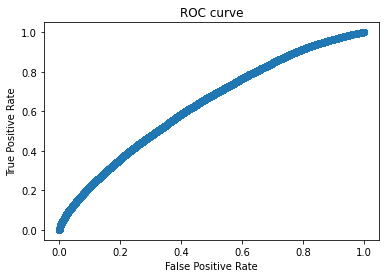

In [0]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test2, y_pred_proba2)

0.6330833202681924